In [1]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 181MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/walmart_data.csv?1641285094')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
len(df)

550068

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [9]:
print(f"""
Unique age = {df['Age'].unique()}
NUnique age = {df['Age'].nunique()}
Unique Stay_In_Current_City_Years = {df['Stay_In_Current_City_Years'].unique()}
NUnique Stay_In_Current_City_Years = {df['Stay_In_Current_City_Years'].nunique()}
Unique City_Category = {df['City_Category'].unique()}
NUnique City_Category = {df['City_Category'].nunique()}

""")

# Data already properly categorized


Unique age = ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
NUnique age = 7
Unique Stay_In_Current_City_Years = ['2' '4+' '3' '1' '0']
NUnique Stay_In_Current_City_Years = 5
Unique City_Category = ['A' 'C' 'B']
NUnique City_Category = 3




In [10]:
df.isna().sum()
# No null values

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [11]:
df.duplicated().sum()

0

In [12]:
# Univariate data analysis

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


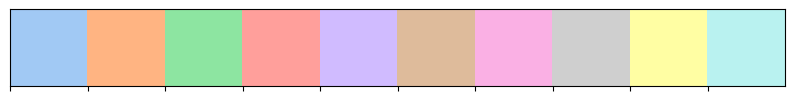

In [14]:
pastel_palette = sns.color_palette("pastel")

sns.set_palette(pastel_palette)

sns.palplot(pastel_palette)
plt.show()

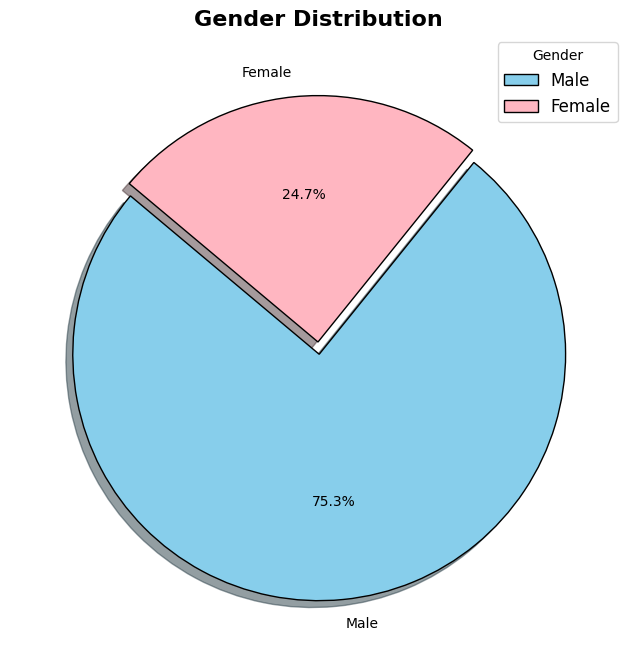

In [15]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts['Gender'] = gender_counts['Gender'].apply(lambda x: 'Male' if x == "M" else 'Female')

colors = ['skyblue', 'lightpink']
explode = [0.05, 0]

plt.figure(figsize=(8, 8))
plt.title("Gender Distribution", fontsize=16, fontweight='bold')

plt.pie(
    gender_counts['count'],
    labels=gender_counts['Gender'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.legend(title="Gender", loc="upper right", fontsize=12)
plt.show()

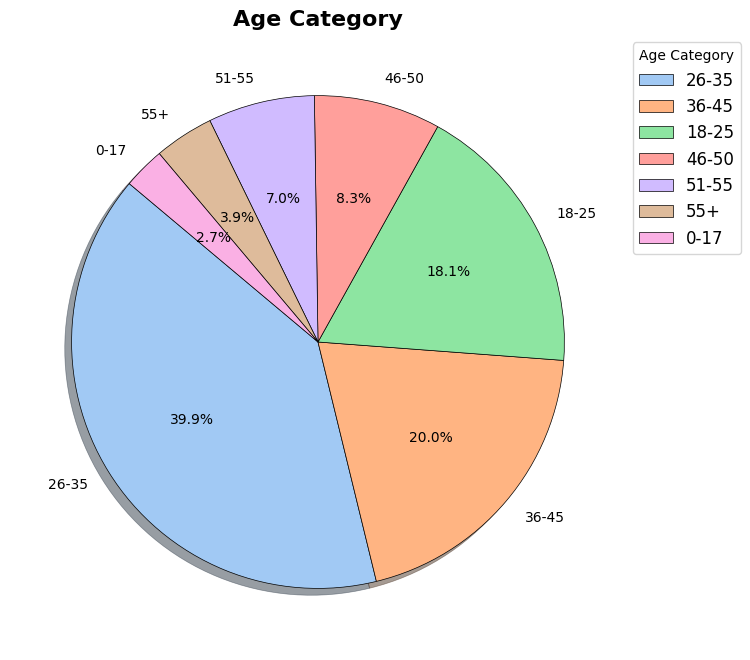

In [16]:
age_counts = df['Age'].value_counts().reset_index()

plt.figure(figsize=(8, 8))
plt.title("Age Category", fontsize=16, fontweight='bold')

plt.pie(
    age_counts['count'],
    labels=age_counts['Age'],
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)

plt.legend(title="Age Category", loc="upper right", fontsize=12, bbox_to_anchor=(1.2,1))
plt.show()

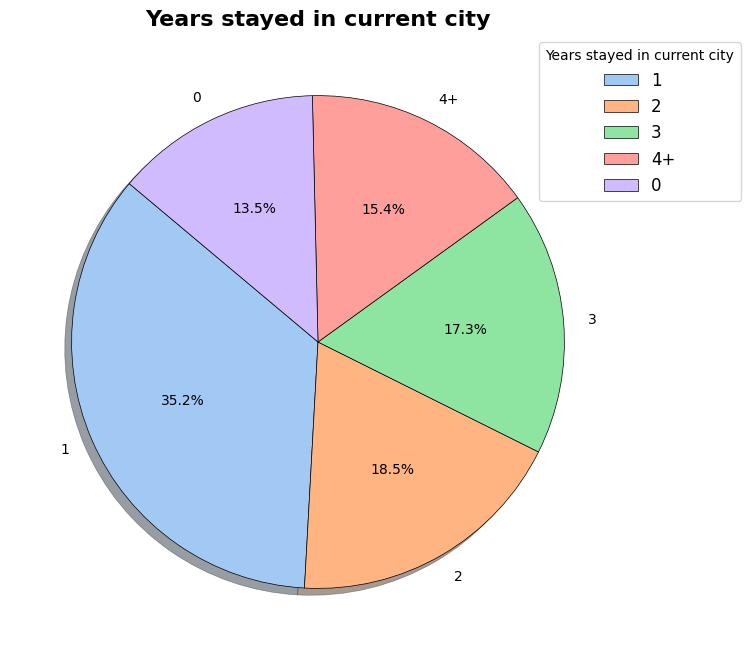

In [17]:
stay = df['Stay_In_Current_City_Years'].value_counts().reset_index()

plt.figure(figsize=(8, 8))
plt.title("Years stayed in current city", fontsize=16, fontweight='bold')

plt.pie(
    stay['count'],
    labels=stay['Stay_In_Current_City_Years'],
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    wedgeprops={'edgecolor': 'black','linewidth': 0.5}
)

plt.legend(title="Years stayed in current city", loc="upper right", fontsize=12, bbox_to_anchor=(1.2,1))
plt.show()

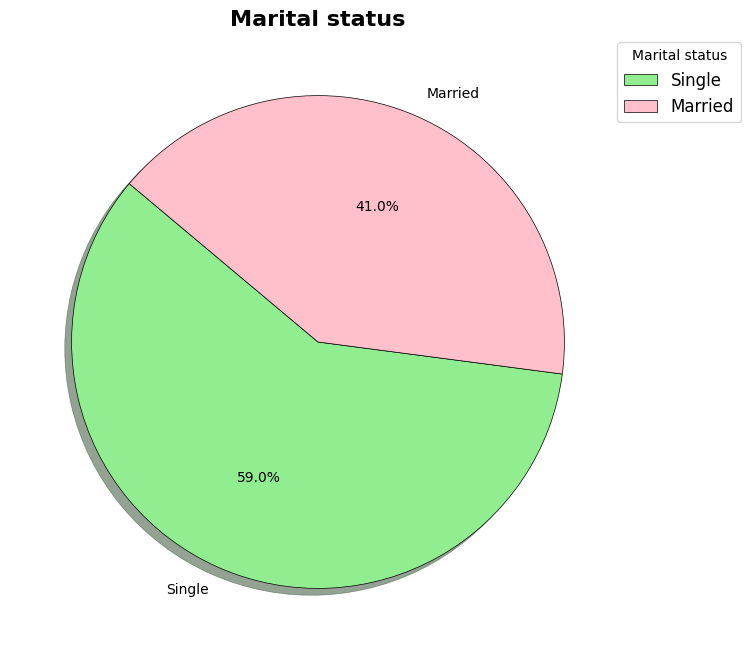

In [18]:
marital_status = df['Marital_Status'].value_counts().reset_index()
marital_status['Marital_Status'] = marital_status['Marital_Status'].apply(lambda x : "Married" if x == 1 else "Single")

plt.figure(figsize=(8, 8))
plt.title("Marital status", fontsize=16, fontweight='bold')

colors=['lightgreen','pink']

plt.pie(
    marital_status['count'],
    labels=marital_status['Marital_Status'],
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    colors=colors ,
    wedgeprops={'edgecolor': 'black','linewidth': 0.5}
)

plt.legend(title="Marital status", loc="upper right", fontsize=12, bbox_to_anchor=(1.2,1))
plt.show()

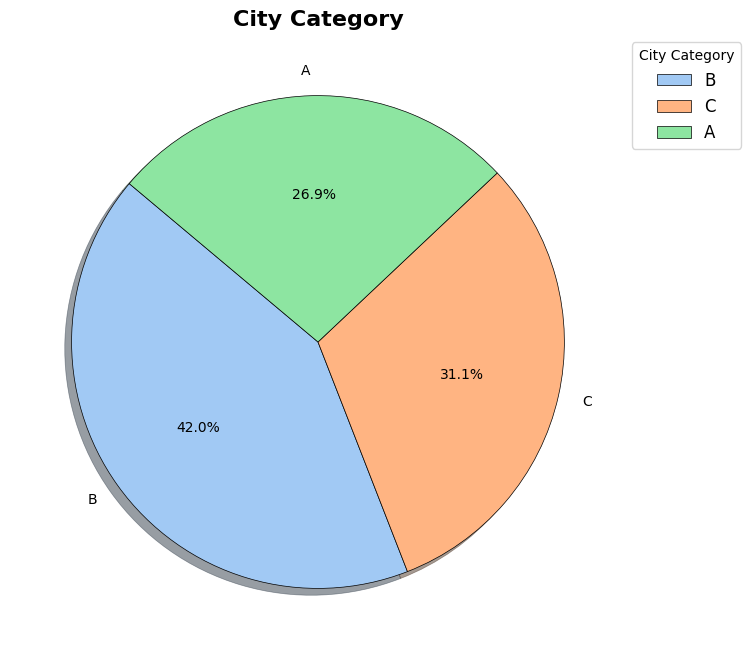

In [19]:
city_category = df['City_Category'].value_counts().reset_index()

plt.figure(figsize=(8, 8))
plt.title("City Category", fontsize=16, fontweight='bold')



plt.pie(
    city_category['count'],
    labels=city_category['City_Category'],
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    wedgeprops={'edgecolor': 'black','linewidth': 0.5}
)

plt.legend(title="City Category", loc="upper right", fontsize=12, bbox_to_anchor=(1.2,1))
plt.show()

<ipython-input-20-c0ed9f263f13>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=occupation_category, x='Occupation', y='count',order=occupation_category['Occupation'],palette=viridis_palette);


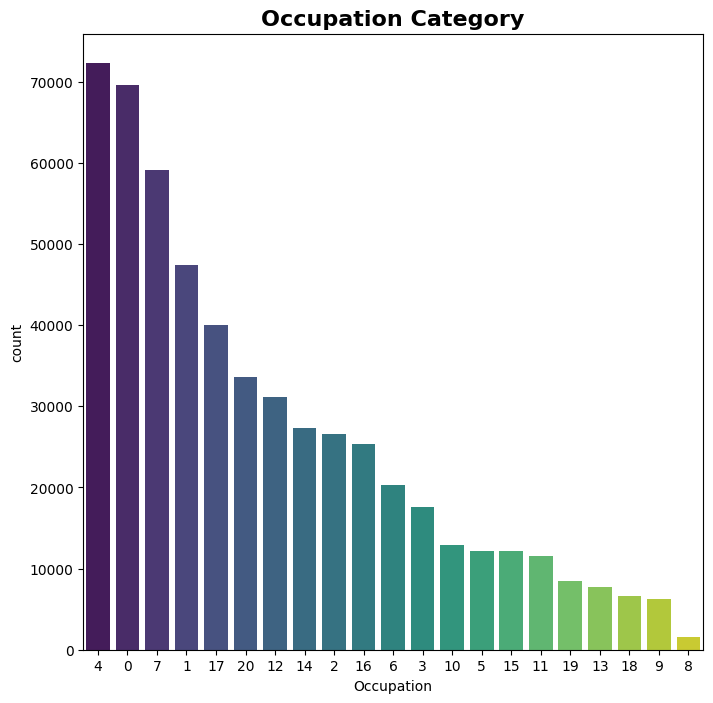

In [20]:
occupation_category = df['Occupation'].value_counts().reset_index()
occupation_category = occupation_category.sort_values(by='count', ascending=False)
viridis_palette = sns.color_palette("viridis", n_colors=len(occupation_category))

plt.figure(figsize=(8, 8))
plt.title("Occupation Category", fontsize=16, fontweight='bold')


sns.barplot(data=occupation_category, x='Occupation', y='count',order=occupation_category['Occupation'],palette=viridis_palette);
plt.legend=False
plt.show();

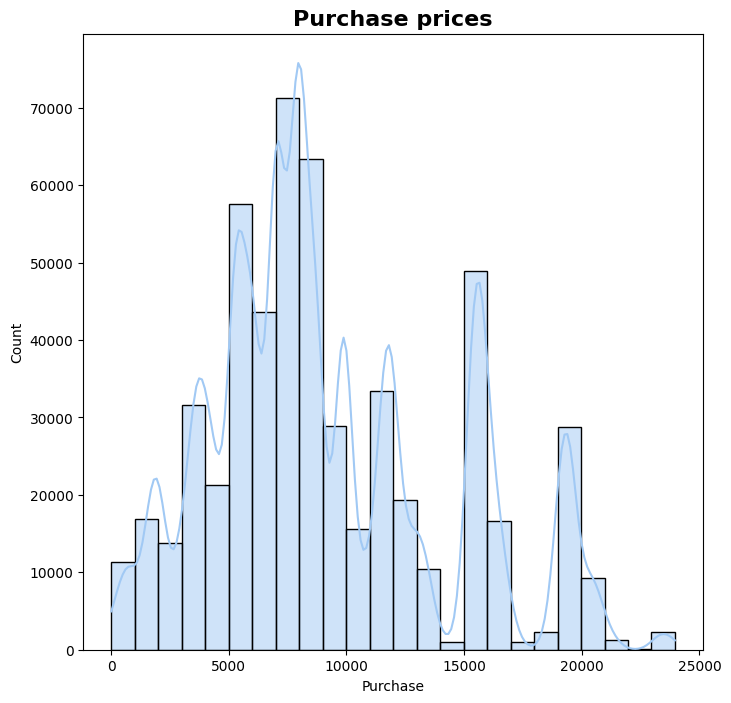

In [21]:
plt.figure(figsize=(8, 8))
plt.title("Purchase prices", fontsize=16, fontweight='bold')

sns.histplot(df['Purchase'], binwidth=1000, kde=True);
plt.show()

In [22]:
# Categorize purchase amount
def categorize_price(price):
    if price < 6000:
        return 'Low'
    elif 6000 <= price < 8000:
        return 'Lower-Mid'
    elif 8000 <= price < 12000:
        return 'Upper-Mid'
    else:
        return 'High'


df['Purchase_Category'] = df['Purchase'].apply(categorize_price)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Upper-Mid
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,High
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Low
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Low
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,Lower-Mid


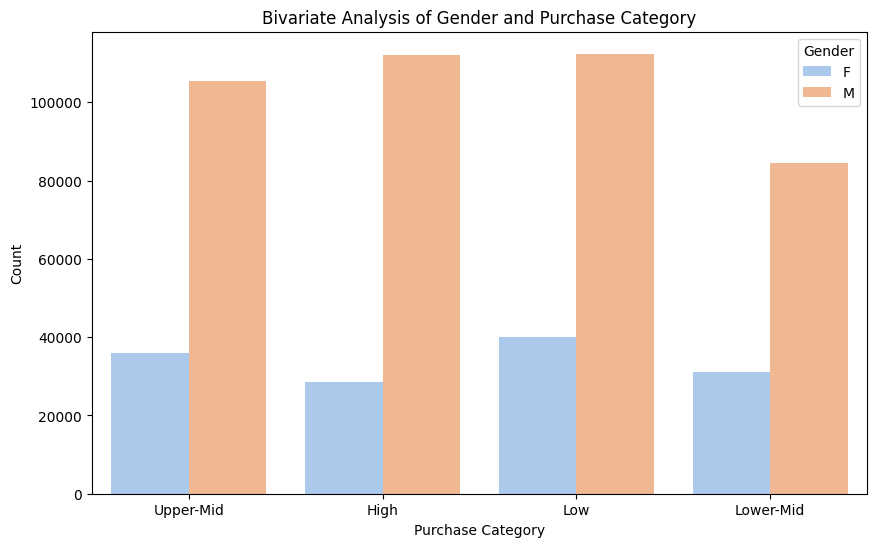

In [47]:
# Bivariate analysis
# Gender vs Purchase category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Purchase_Category', hue='Gender')
plt.title('Bivariate Analysis of Gender and Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.show()

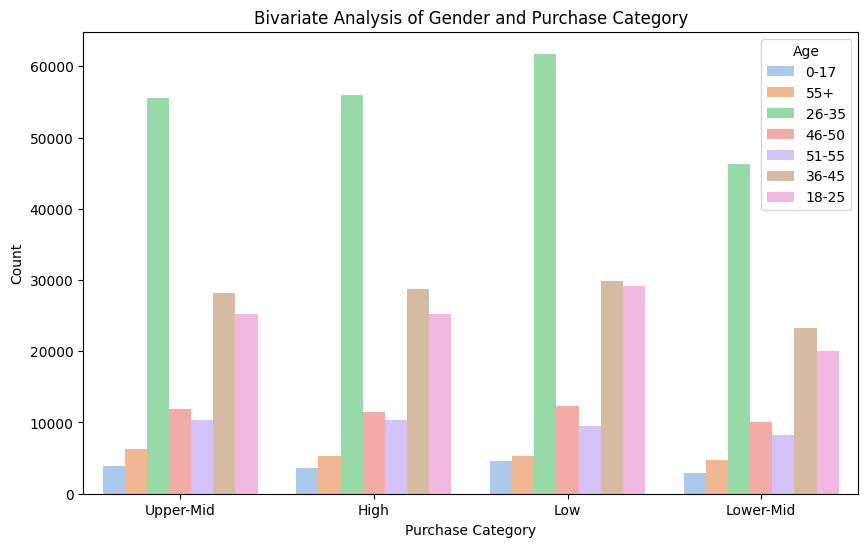

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Purchase_Category', hue='Age')
plt.title('Bivariate Analysis of Gender and Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.show()

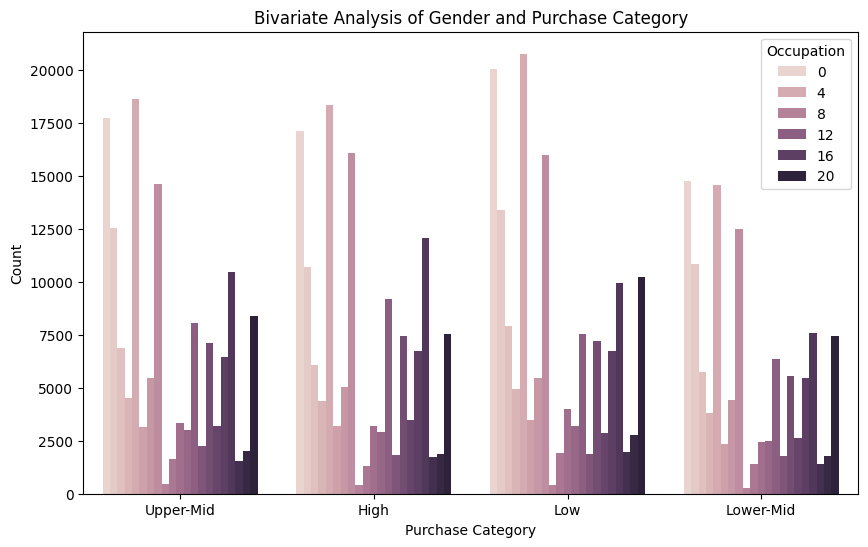

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Purchase_Category', hue='Occupation')
plt.title('Bivariate Analysis of Gender and Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.show()

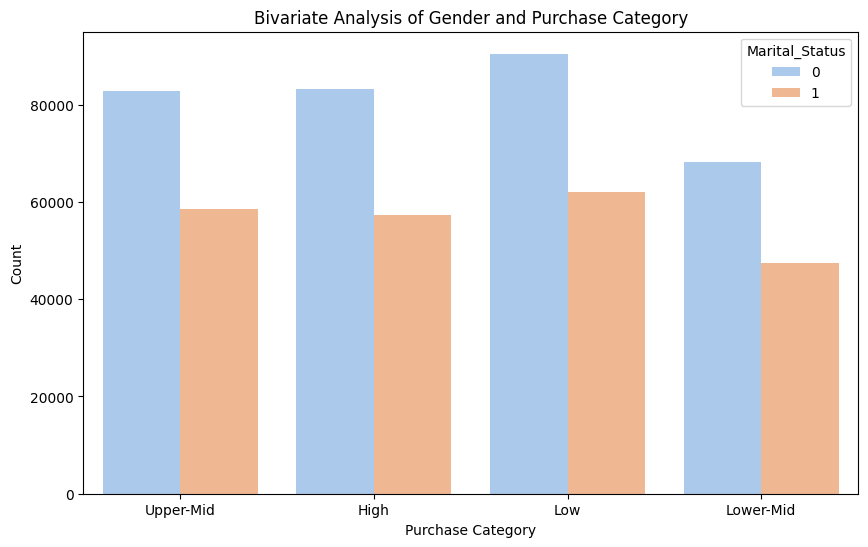

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Purchase_Category', hue='Marital_Status')
plt.title('Bivariate Analysis of Gender and Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.show()

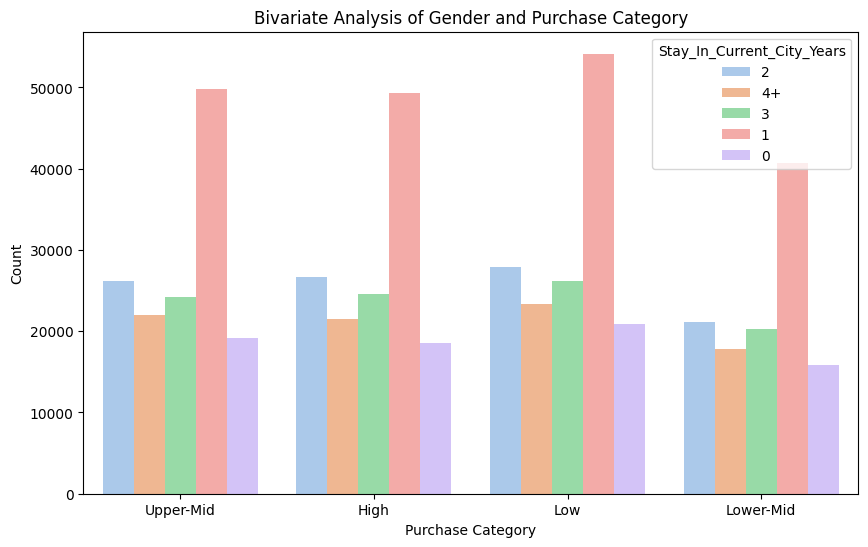

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Purchase_Category', hue='Stay_In_Current_City_Years')
plt.title('Bivariate Analysis of Gender and Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.show()

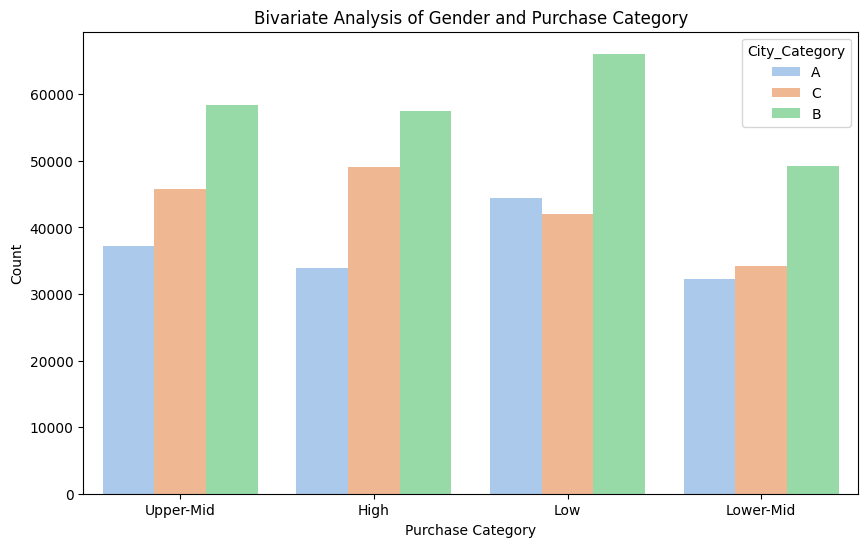

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Purchase_Category', hue='City_Category')
plt.title('Bivariate Analysis of Gender and Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.show()

[]

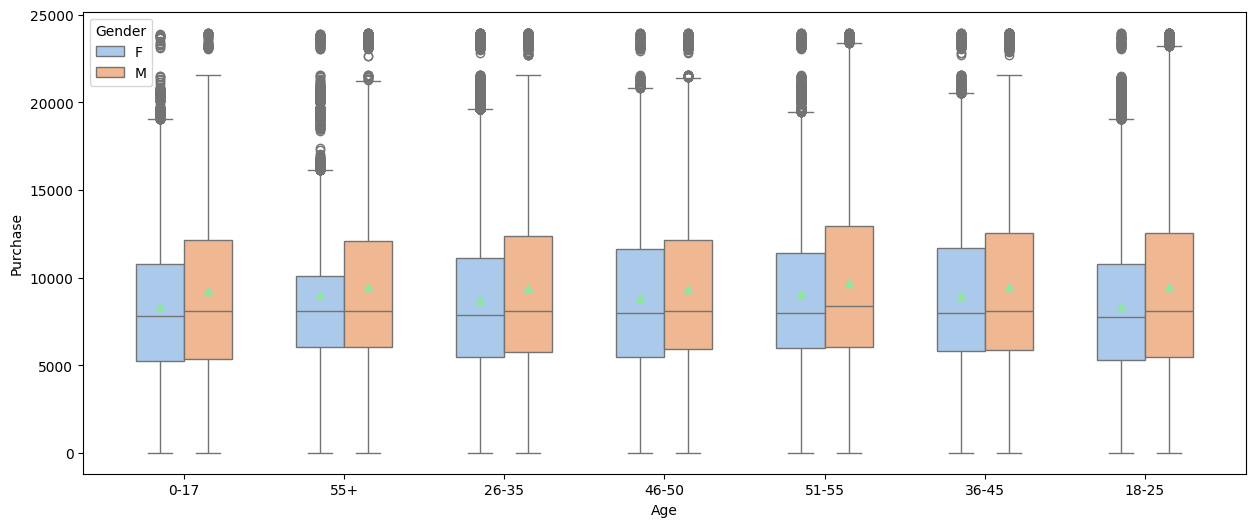

In [29]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender', showmeans = True, width = 0.6)
plt.plot()

[]

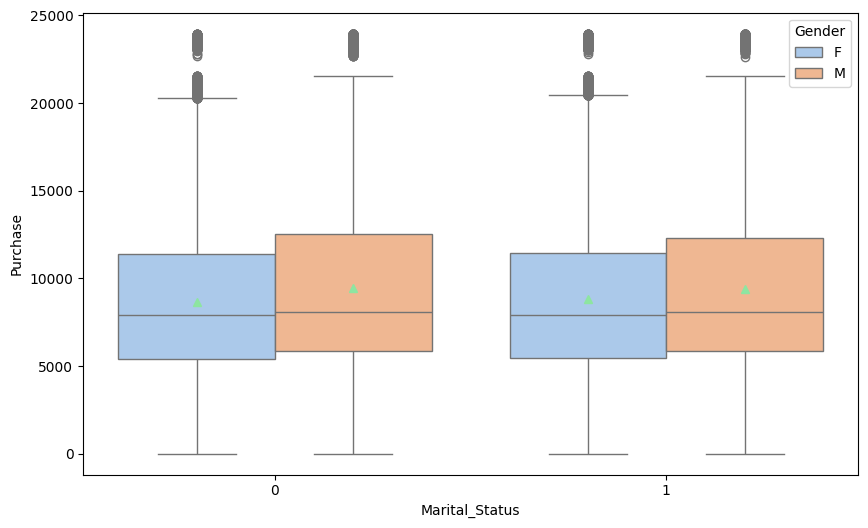

In [30]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Gender', showmeans = True, width  = 0.8)
plt.plot()

[]

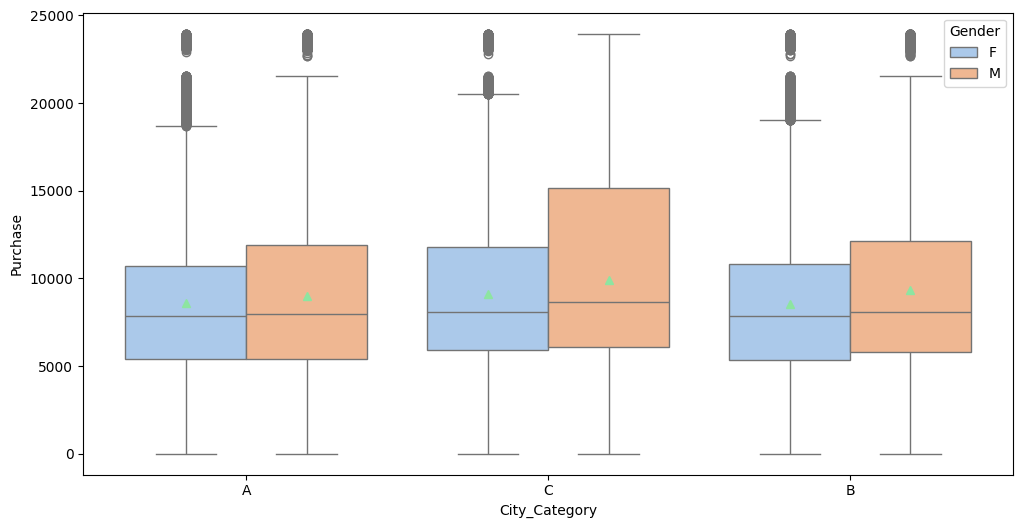

In [31]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'City_Category', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

[]

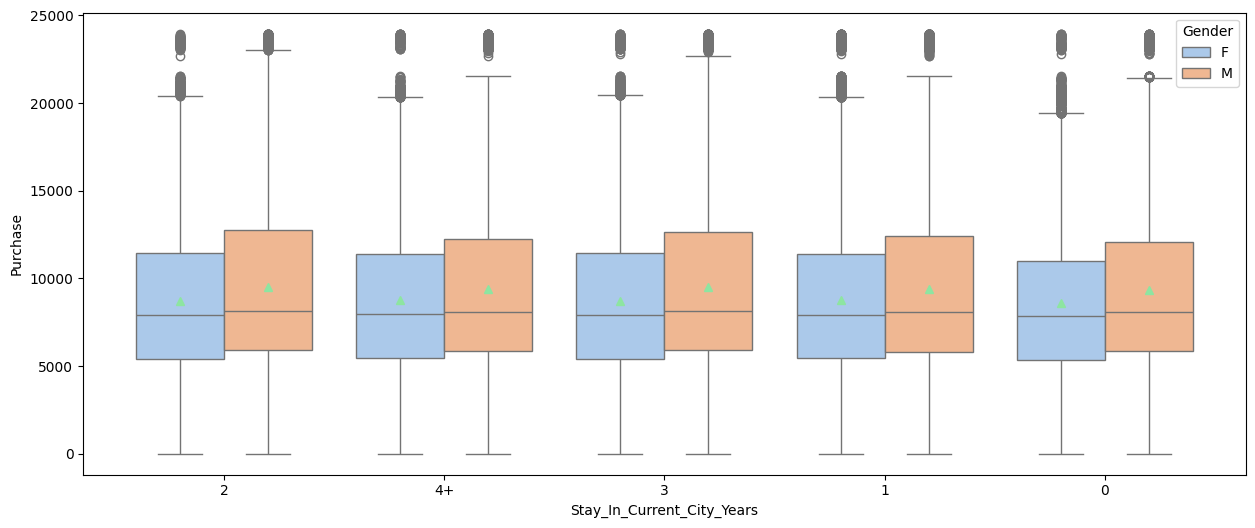

In [32]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

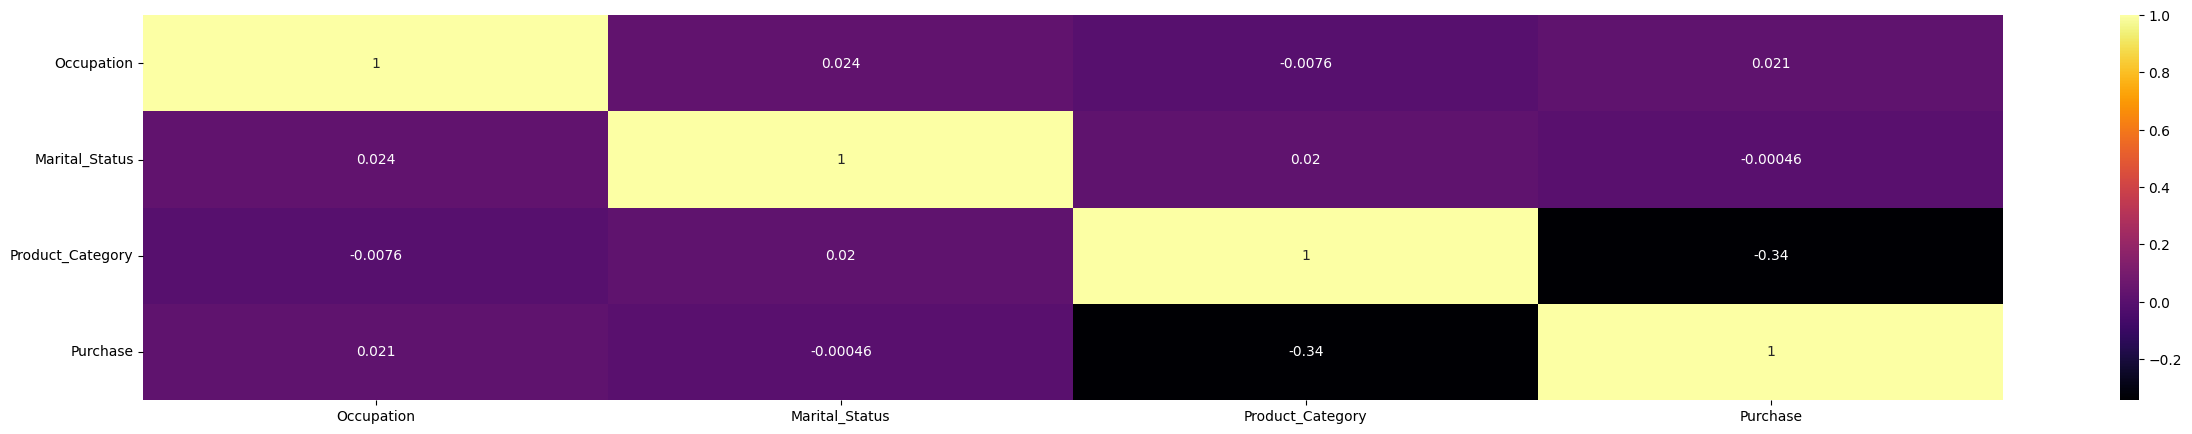

In [33]:

plt.figure(figsize=(30,5))
sns.heatmap(df[[ 'Occupation' ,	'Marital_Status', 	'Product_Category' ,	'Purchase']].corr(), cmap="inferno", annot=True)
plt.show()

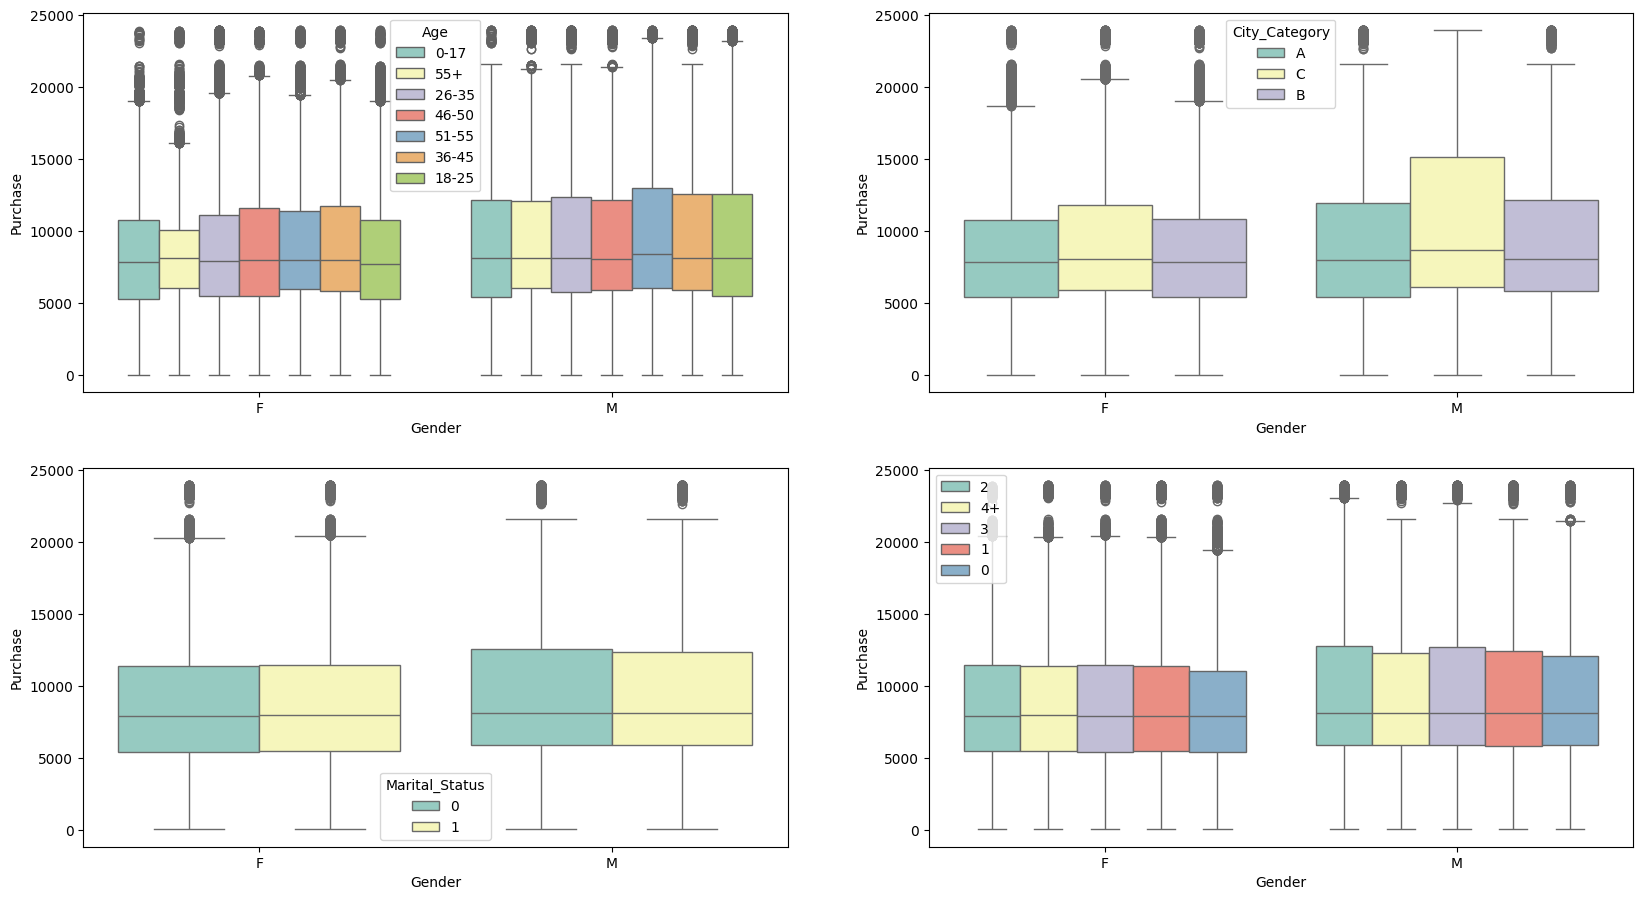

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()


In [35]:
# Average amount spent by male v/s female
avg_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
avg_df = avg_df.reset_index()
avg_df['Gender'].value_counts()



,count
Gender,
M,4225
F,1666


In [36]:
male_avg = avg_df[avg_df['Gender']=='M']['Purchase'].mean()
female_avg = avg_df[avg_df['Gender']=='F']['Purchase'].mean()

print("Average amount spent by Male customers: {:.2f}".format(male_avg))
print("Average amount spent by Female customers: {:.2f}".format(female_avg))

Average amount spent by Male customers: 925344.40
Average amount spent by Female customers: 712024.39


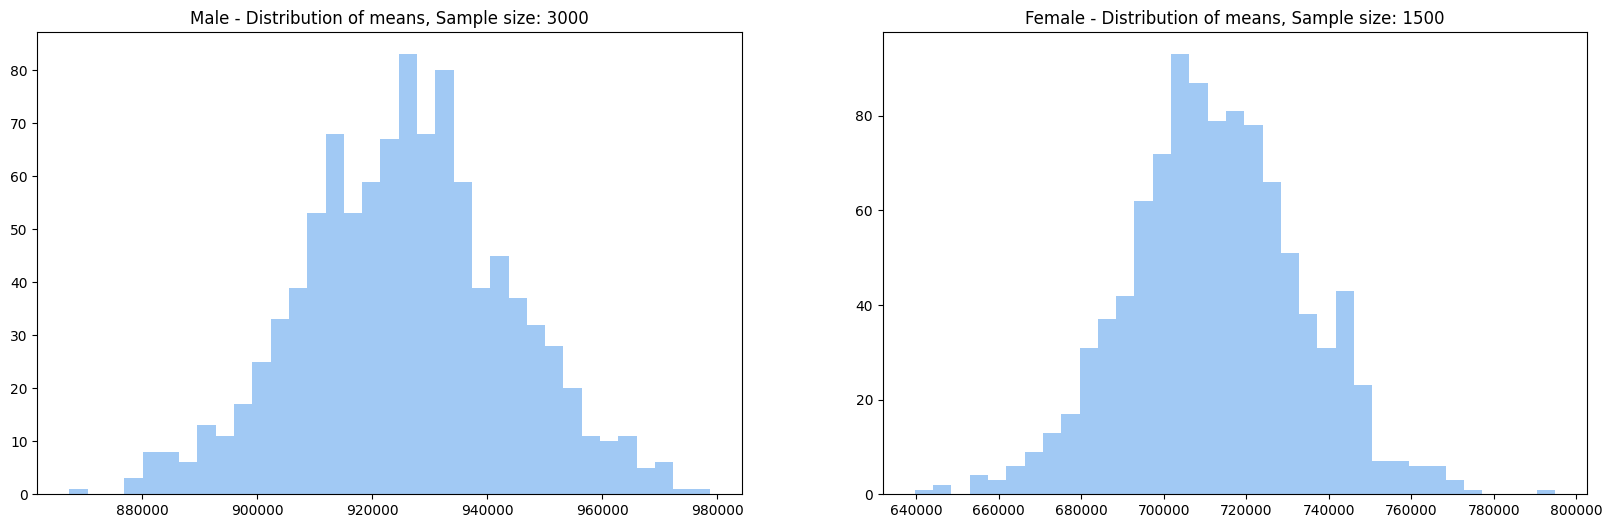

Population mean - Mean of sample means of amount spend for Male: 925771.21
Population mean - Mean of sample means of amount spend for Female: 712454.81

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


In [37]:
male_df = avg_df[avg_df['Gender']=='M']
female_df = avg_df[avg_df['Gender']=='F']

genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))



In [38]:
# margin of erro  = z_multipier * sigma / sqrt(sample_size)


male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


In [39]:
marital_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
marital_df = marital_df.reset_index()
marital_df

marital_df['Marital_Status'].value_counts()



,count
Marital_Status,
0,3417
1,2474


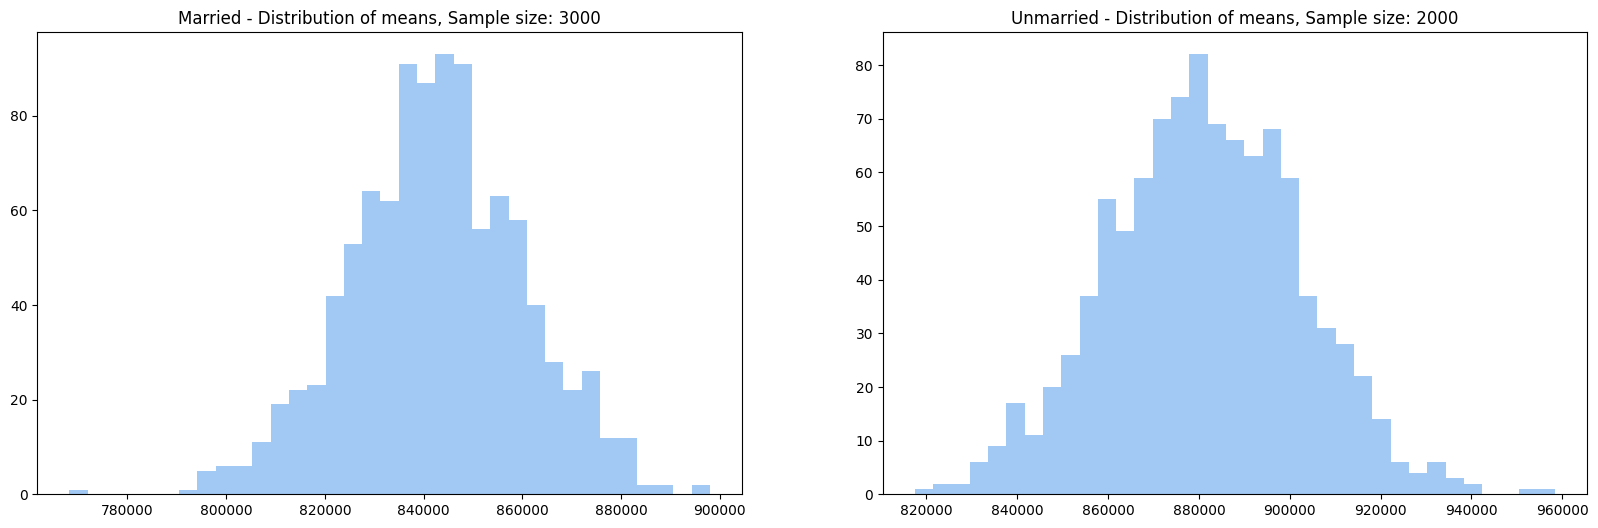

Population mean - Mean of sample means of amount spend for Married: 842625.86
Population mean - Mean of sample means of amount spend for Unmarried: 881204.14

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [40]:
married_sample_size = 3000
unmarried_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = marital_df[marital_df['Marital_Status']==1].sample(married_sample_size, replace=True)['Purchase'].mean()
    unmarid_mean = marital_df[marital_df['Marital_Status']==0].sample(unmarried_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(marital_df[marital_df['Marital_Status']==1]['Purchase'].mean(), marital_df[marital_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(marital_df[marital_df['Marital_Status']==0]['Purchase'].mean(), marital_df[marital_df['Marital_Status']==0]['Purchase'].std()))

In [42]:
# Married

marital_status =1


new_df = marital_df[marital_df['Marital_Status']==marital_status]

margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
sample_mean = new_df['Purchase'].mean()
lower_lim = sample_mean - margin_of_error_clt
upper_lim = sample_mean + margin_of_error_clt

print("{} confidence interval of means: ({:.2f}, {:.2f})".format("Married", lower_lim, upper_lim))

Married confidence interval of means: (806668.83, 880384.76)


In [43]:
# unmarried

marital_status = 0


new_df = marital_df[marital_df['Marital_Status']==marital_status]

margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
sample_mean = new_df['Purchase'].mean()
lower_lim = sample_mean - margin_of_error_clt
upper_lim = sample_mean + margin_of_error_clt

print("{} confidence interval of means: ({:.2f}, {:.2f})".format("Unmarried", lower_lim, upper_lim))

Unmarried confidence interval of means: (848741.18, 912410.38)


In [44]:
age_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
age_df = age_df.reset_index()
age_df

age_df['Age'].value_counts()



,count
Age,
26-35,2053
36-45,1167
18-25,1069
46-50,531
51-55,481
55+,372
0-17,218


In [45]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = age_df[age_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = age_df[age_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))



For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)
